In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
np.random.seed(1)

## Interlude: Introduction to Linear (and Polynomial) Regression and Regularization
Let's return to our example data from earlier, except this time instead of using KNN Regression, we will briefly introduce Linear Regression (which we will study in more detail next week), how to extend linear models to be (apparently) non-linear by adding features, and the concept of *Regularization* which will help us control the complexity of the linear regression model. Ultimately, the purpose of briefly introducing linear regression now is because it provides us a nice test-case where we have multiple model hyper-parameters that we will need to *tune* (or find the best settings of), and thus will motivate some of our interest in optimization which we will build upon in the future.

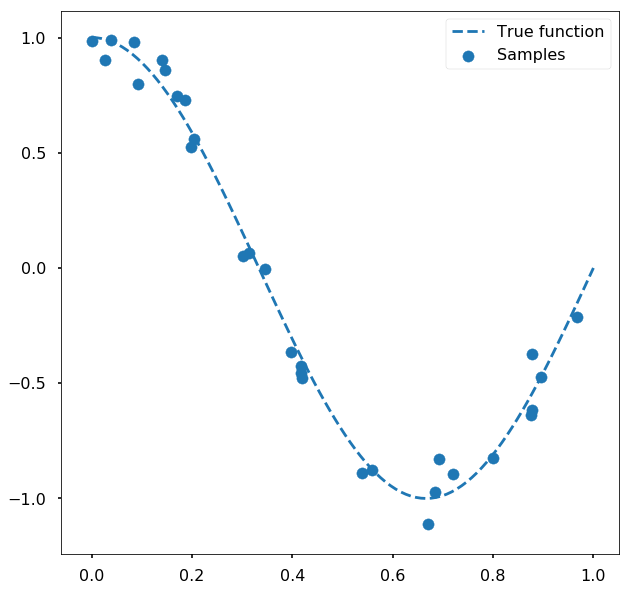

In [3]:
n_samples = 30

# True Function we want to estimate
true_fun = lambda X: np.cos(1.5 * np.pi * X)

# Noisy Samples from the true function
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(10,10))
# Plot the true function:
X_plot = np.linspace(0, 1, 100)
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# Plot the data samples
plt.scatter(X,y, label="Samples")
plt.legend(loc="best")
plt.show()

In [4]:
# Just for the purposes of display, set the print precision to 2 decimals
%precision 2
X[:, np.newaxis]

array([[1.14e-04],
       [2.74e-02],
       [3.91e-02],
       [8.50e-02],
       [9.23e-02],
       [1.40e-01],
       [1.47e-01],
       [1.70e-01],
       [1.86e-01],
       [1.98e-01],
       [2.04e-01],
       [3.02e-01],
       [3.13e-01],
       [3.46e-01],
       [3.97e-01],
       [4.17e-01],
       [4.17e-01],
       [4.19e-01],
       [5.39e-01],
       [5.59e-01],
       [6.70e-01],
       [6.85e-01],
       [6.92e-01],
       [7.20e-01],
       [8.01e-01],
       [8.76e-01],
       [8.78e-01],
       [8.78e-01],
       [8.95e-01],
       [9.68e-01]])

In [5]:
# Let's build some Polynomial features:
from sklearn.preprocessing import PolynomialFeatures
d=3
pfeatures = PolynomialFeatures(degree=d,include_bias=False)
pfeatures.fit_transform(X[:, np.newaxis])

array([[1.14e-04, 1.31e-08, 1.50e-12],
       [2.74e-02, 7.50e-04, 2.05e-05],
       [3.91e-02, 1.53e-03, 5.96e-05],
       [8.50e-02, 7.23e-03, 6.15e-04],
       [9.23e-02, 8.53e-03, 7.87e-04],
       [1.40e-01, 1.97e-02, 2.77e-03],
       [1.47e-01, 2.15e-02, 3.16e-03],
       [1.70e-01, 2.88e-02, 4.90e-03],
       [1.86e-01, 3.47e-02, 6.46e-03],
       [1.98e-01, 3.92e-02, 7.77e-03],
       [2.04e-01, 4.18e-02, 8.55e-03],
       [3.02e-01, 9.14e-02, 2.76e-02],
       [3.13e-01, 9.82e-02, 3.08e-02],
       [3.46e-01, 1.19e-01, 4.13e-02],
       [3.97e-01, 1.57e-01, 6.25e-02],
       [4.17e-01, 1.74e-01, 7.25e-02],
       [4.17e-01, 1.74e-01, 7.27e-02],
       [4.19e-01, 1.76e-01, 7.37e-02],
       [5.39e-01, 2.90e-01, 1.56e-01],
       [5.59e-01, 3.12e-01, 1.74e-01],
       [6.70e-01, 4.50e-01, 3.01e-01],
       [6.85e-01, 4.70e-01, 3.22e-01],
       [6.92e-01, 4.79e-01, 3.32e-01],
       [7.20e-01, 5.19e-01, 3.74e-01],
       [8.01e-01, 6.41e-01, 5.13e-01],
       [8.76e-01, 7.68e-0

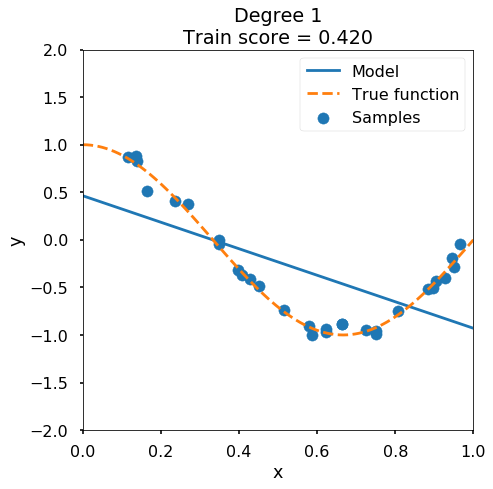

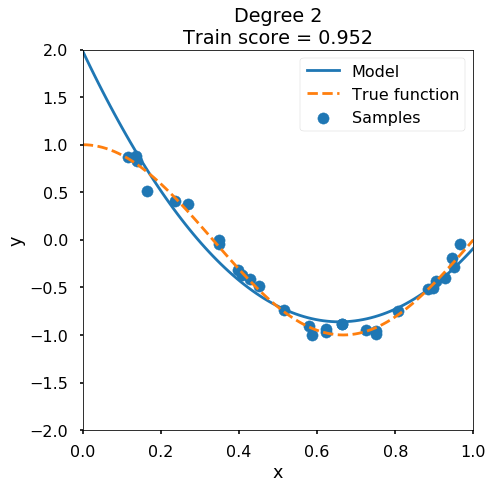

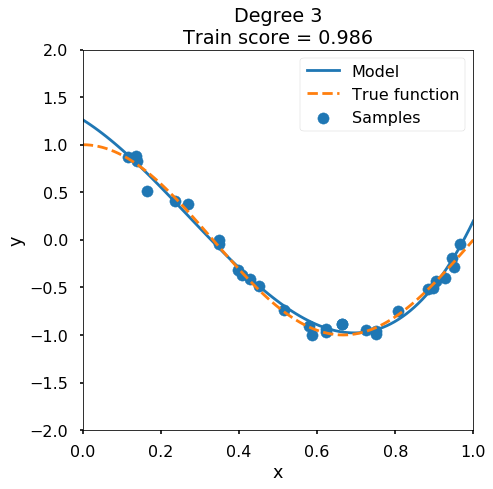

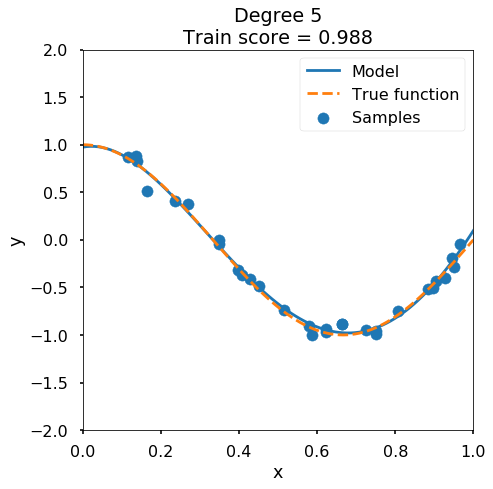

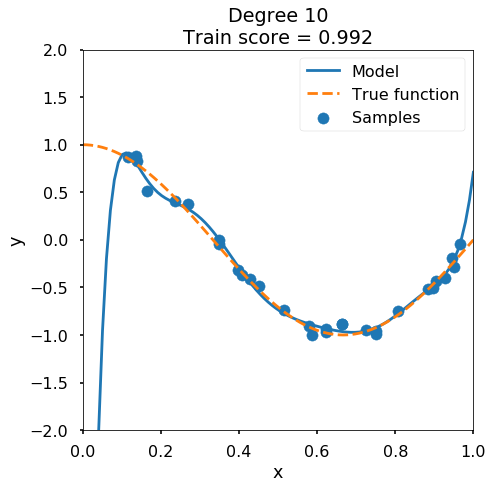

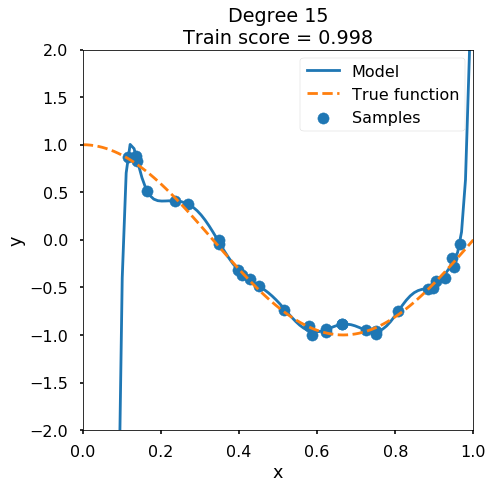

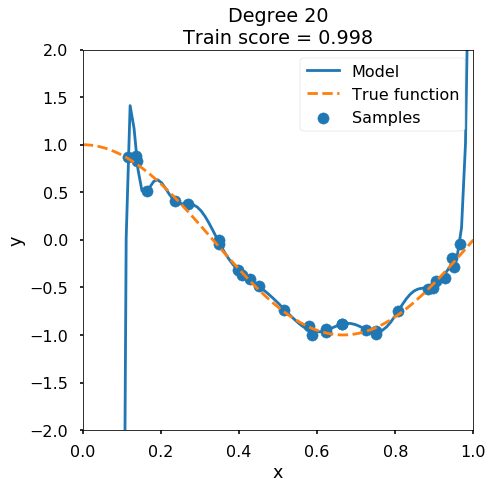

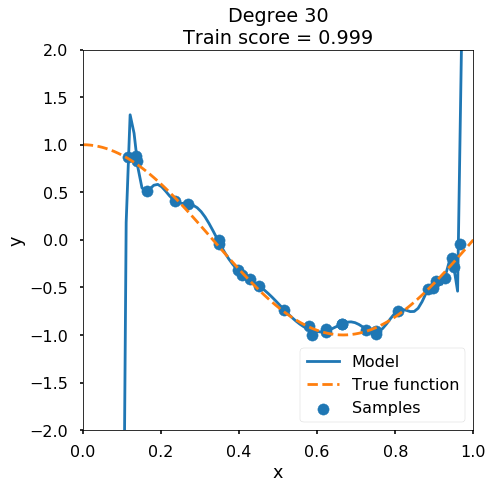

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Here is a list of different degree polynomials to try out
degrees = [1,2,3,5,10,15,20,30]

# Generate samples of the true function + noise
X = np.sort(np.random.rand(n_samples))
noise_amount = 0.1
y = true_fun(X) + np.random.randn(n_samples) * noise_amount

# For each of the different polynomial degrees we listed above
for d in degrees:
    plt.figure(figsize=(7, 7)) # Make a new figure
    # Construct the polynomial features
    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False)
    # Construct linear regression model
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    # Now fit the data first through the 
    # polynomial basis, then do regression
    pipeline.fit(X[:, np.newaxis], y)
    
    # Get the accuracy score of the trained model
    # on the original training data
    score = pipeline.score(X[:, np.newaxis],y)

    # Plot the results
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    # Print the polynomial degree and the training
    # accuracy in the title of the graph
    plt.title("Degree {}\nTrain score = {:.3f}".format(
        d, score))
    plt.show()   

In [7]:
linear_regression.coef_


array([ 5.44e+05, -1.21e+07,  1.60e+08, -1.42e+09,  8.92e+09, -4.06e+10,
        1.36e+11, -3.26e+11,  5.41e+11, -5.31e+11,  1.08e+11,  3.98e+11,
       -3.12e+11, -2.73e+11,  3.35e+11,  2.63e+11, -2.92e+11, -3.24e+11,
        1.93e+11,  3.94e+11, -3.82e+10, -4.23e+11, -1.34e+11,  3.98e+11,
        2.75e+11, -3.98e+11, -3.13e+11,  6.28e+11, -3.30e+11,  6.05e+10])

What is going on here? To understand this, we need to understand something about how the model is optimizing error. 

Show Linear Regression MSE Example on board and introduce the idea of loss functions.

## How do we deal with this tradeoff? Regularization!
$$
Cost = Loss(w,D) + \Omega(w)
$$
where $\Omega(w)$ represents what we call a "Regularization" of the function or a "Penalty Term" The purpose of $\Omega(w)$ is to help us prevent the (otherwise complex) model from being overly complicated, by penalizing this complexity. There are many ways to do this that we will see later on, but one common way to do this for linear models is to penalize the **total weight** that you allow all of the $w_i$ to have. Specifically how one calculates this total weight turns out to matter a lot, and we shall see it return in future weeks. But to get us started in un-packing how to do this, we first need to talk about what a [Norm](https://en.wikipedia.org/wiki/Norm_(mathematics)) is, how it relates to Linear Regression weights, and how it helps us perform Regularization.

## Norms and their relationship to Regularization
A Norm is a concept in mathematics that allows us to essentially measure length or size, typically of vectors. Any time you have tried to compute the distance between two points in space (say, by using the Pythagorean Theorem), or the magnitude of an applied Force vector, you have been using a Norm -- most likely the Euclidean Norm or Euclidean Distance. For example, for a vector $\mathbf{x}$ with $n$ dimensions, the Euclidean Norm looks like this:
$$
||\mathbf{x}||_2 = \sqrt{ x_1^2 + x_2^2 + \cdots x_n^2 }
$$
If you have ever had to compute the total Force Magnitude given its x and y components (for example, in Statics class), you have used the Euclidean Norm to do so. In that context, it served to take multiple components of a Force aggregate them in such a way as to tell you something about the **total force** -- by analogy, we will do the same thing here with linear regression, where each weight is like a component and we can use the Euclidean Norm to compute the total weight.

While Euclidean Norms may be quite useful or familiar to Engineers, it turns out that they are a special case of a much wider *family* of Norms called [*p-norms*](https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_finite_dimensions), which are defined as:
$$
||\mathbf{x}||_p = \left(|x_1|^p + |x_2|^p+\cdots + |x_n|^p\right)^{1/p} = \left(\sum_{i=1}^n \left| x_i \right|^p \right)^p
$$

Specifically, the Euclidean Norm is called the L2-norm, or sometimes just the 2-norm. To see why this is, just set $p=2$ in the above, and note how it corresponds to the Euclidean Norm that we all know and love. So, by setting $p$ to a number between $0$ and $\infty$, we can modify what the *total weight* means, and setting $p=2$ is the setting which we are all most familiar with. To get a visual sense of how norms vary, see below, which visualizes a line of "circle" of radius 1, but where the length of the line is determined by the p-norm. You will see that when p=2 this corresponds to what we are familiar with, but when p goes up or down things change.

![illustrations of p-Norms](2D_unit_balls.png "p-Norms")

For today, we will just focus on the L2-Norm, however we will revist norms again next week where we will see how changing the one we are using can have positive or negative effects in certain circumstances. 

For today's purpose, we will use the L2-Norm to help us penalize having linear regression models with really large weights, by essentially putting a cost on the total weight of the weight vector, where the total is measured by the L2-Norm. That is:
$$
Cost = \sum_{n=1}^{N}||y-w\cdot x||^2 + \alpha \cdot ||w||^2
$$
Where $\alpha$ is the price we pay for including more weight in the linear model. If it reduces our error cost enough to offset the cost of the increased weight, then that may be worth it to us. Otherwise, we would err on the side of using less weight overall.

This Regularization (i.e., increasing $\alpha$) essentially allows you to trade off bias and variance.

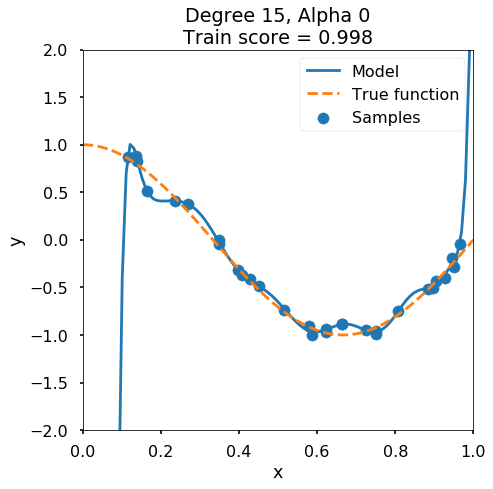

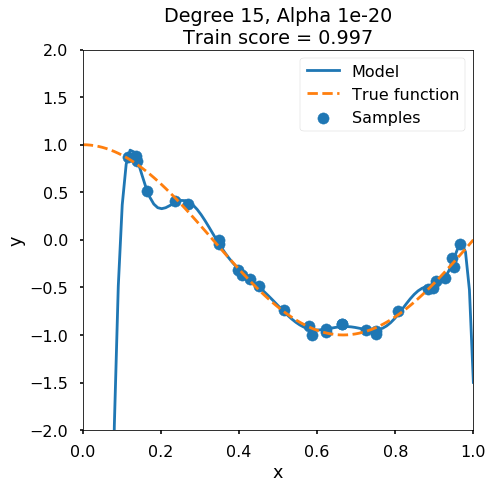

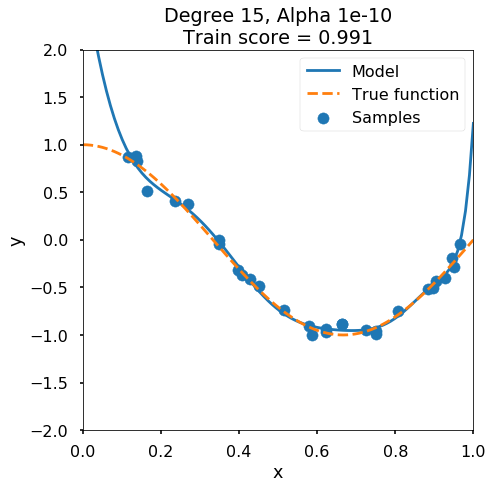

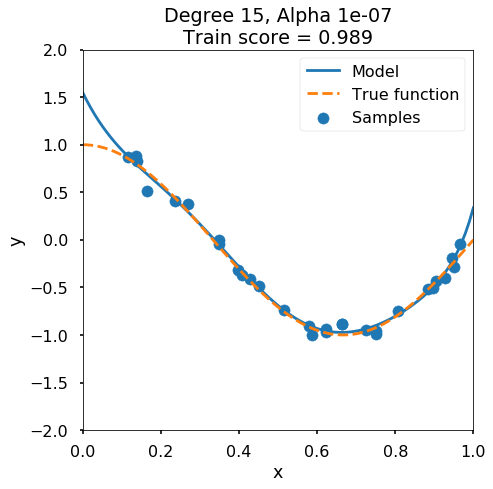

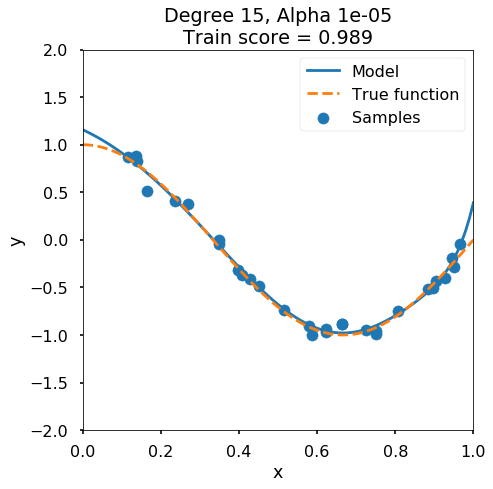

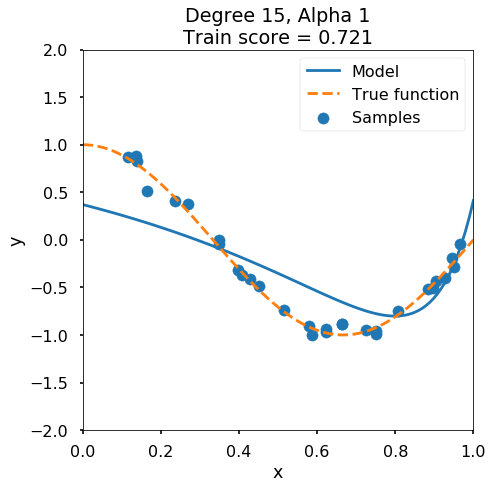

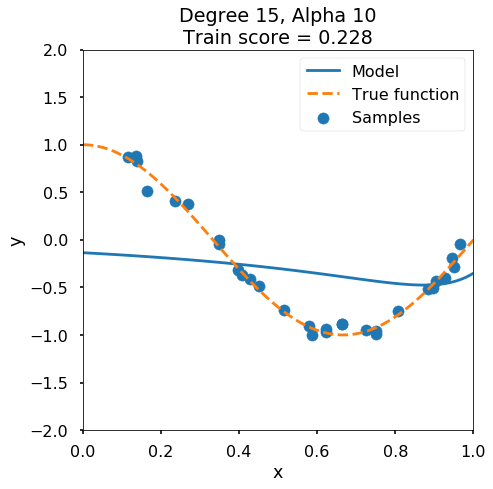

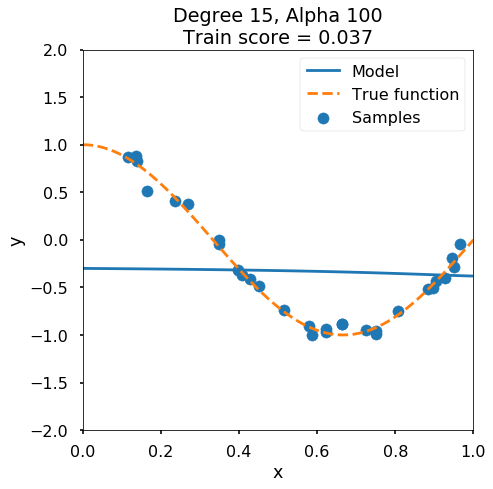

In [8]:
# Import Ridge Regression
from sklearn.linear_model import Ridge

# alpha determines how much of 
# a penalty the weights incur
alphas = [0, 1e-20, 1e-10, 1e-7, 1e-5, 1, 10, 100]

# For the below example, let's
# just consider a 15-degree polynomial
d=15
np.random.seed(100)

for a in alphas:
    plt.figure(figsize=(7, 7))
    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False)
    #linear_regression = LinearRegression() #<- Note difference with next line
    linear_regression = Ridge(alpha=a)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    # Fit model
    pipeline.fit(X[:, np.newaxis], y)
    # Get Training Accuracy
    score = pipeline.score(X[:, np.newaxis],y)

    # Plot things
    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    plt.title("Degree {}, Alpha {}\nTrain score = {:.3f}".format(
        d, a, score))
    plt.show()

##  Can we evaluate this more rigorously?
Yes, we can use data we have not seen yet to get an estimate of the generalization error. One popular way to do this is through Cross-Validation:

In [9]:
# Now let's split the data into training and test data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=0)

Let's take a look at what the above has actually done.

X_train
 [0.94 0.45 0.66 0.81 0.27 0.62 0.4  0.59 0.88 0.75 0.14 0.96 0.35 0.24
 0.66 0.73 0.41 0.35 0.9  0.17 0.11 0.75 0.62 0.51] 

X_test
 [0.14 0.95 0.58 0.43 0.93 0.9 ] 

y_train
 [-0.19 -0.48 -0.89 -0.75  0.38 -0.97 -0.32 -1.   -0.51 -0.96  0.89 -0.04
 -0.04  0.41 -0.88 -0.94 -0.37  0.   -0.44  0.51  0.87 -0.99 -0.94 -0.74] 

y_test
 [ 0.82 -0.28 -0.9  -0.41 -0.4  -0.51] 



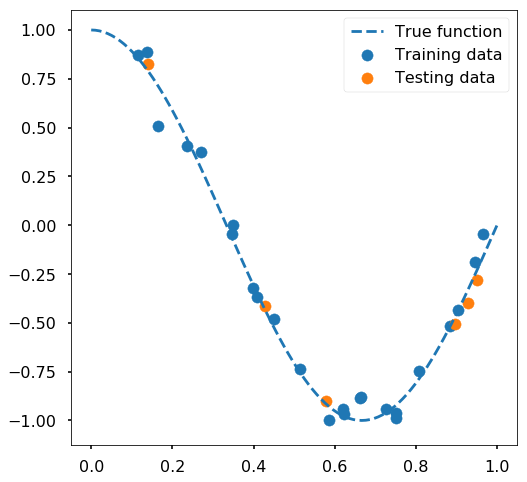

In [10]:
print('X_train\n',X_train,'\n')
print('X_test\n',X_test,'\n')
print('y_train\n',y_train,'\n')
print('y_test\n',y_test,'\n')

plt.figure(figsize=(8,8))
plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
# plot the training and testing points in colors
plt.scatter(X_train,y_train, label="Training data")
plt.scatter(X_test,y_test, label="Testing data")
plt.legend(loc="best")
plt.show()

Key idea in cross validation is to test the model on data that was separate from the data you trained on.

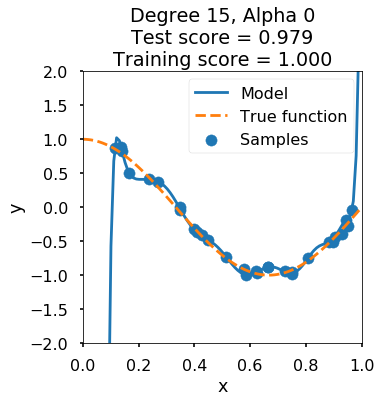

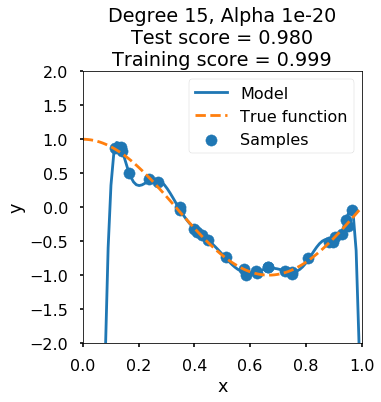

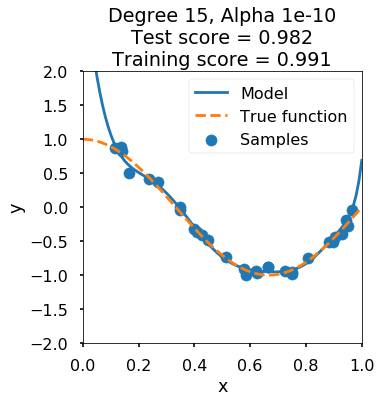

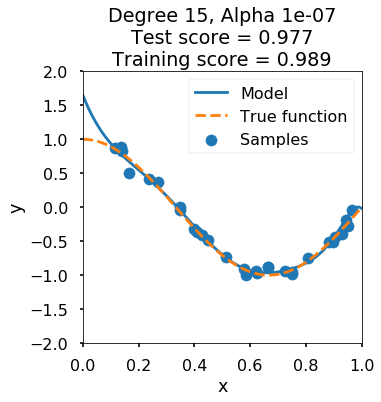

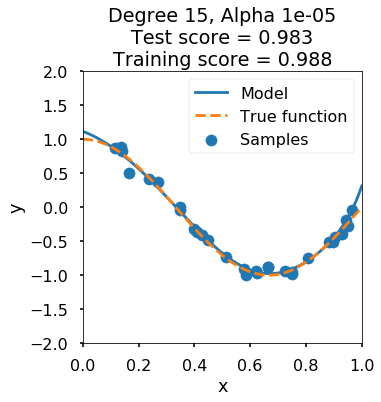

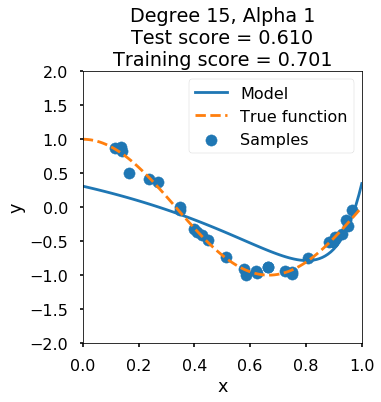

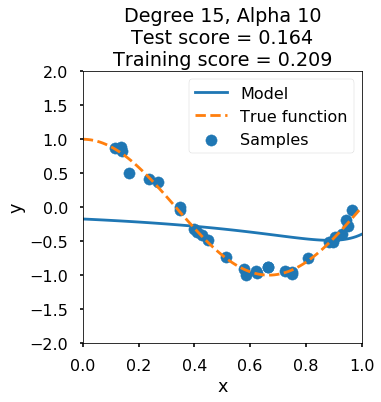

In [11]:
alphas = [0, 1e-20, 1e-10, 1e-7, 1e-5, 1,10]
d=15
for a in alphas:
    plt.figure(figsize=(5, 5))
    #plt.setp(ax, xticks=(), yticks=())
    polynomial_features = PolynomialFeatures(degree=d,
                                             include_bias=False)
    linear_regression = LinearRegression()
    linear_regression = Ridge(alpha=a)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    #pipeline.fit(X[:, np.newaxis], y)
    pipeline.fit(X_train[:, np.newaxis], y_train)
    # Evaluate the models using crossvalidation
    #scores = cross_validation.cross_val_score(pipeline,
    #    X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    testing_score = pipeline.score(X_test[:, np.newaxis],y_test)
    training_score = pipeline.score(X_train[:, np.newaxis],y_train)

    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, true_fun(X_plot), '--',label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    plt.title("Degree {}, Alpha {}\nTest score = {:.3f}\nTraining score = {:.3f}".format(
        d, a, testing_score,training_score))
    plt.show()